# Week 5 Assignment - EDA

**Brian Roepke**  
**DATA 110**  
**February 14, 2021**  

Here you are performing EDA (exploratory data analysis). 

Your project should include the following parts:

A - Load the dataset and describe the data:

 * Dimensions of the dataset
 * Peek at the data itself (eg: pandas head/tail)
 * Statistical summary of all attributes
 * Breakdown of the data by the class variable (eg: by Lily type)

B - Visualize the data: Univariate refers to a single variable while Multivariate refers to multiple variables.
 * Univariate plots - sepal-length, sepal-width, petal-length, petal-width
 * Histograms
 * Multivariate plots

## Data Import and Description

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("irisdata.csv")

### Dimensions

In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Info:** `150` total observations across `5` columns.  `4` column data types are `floating-point` numbers and one as an `object` type.

### Numerical Data

In [5]:
# get numerical data only
numeric_data = df.select_dtypes(include=['float'])

numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**Numerical Data:** There are `4` numerical columns. `sepal-lenth`, `sepal-width`, `petal-length`, and `petal-width`.

### Categorical Data

In [31]:
# Change the ojbect type to a category type
df['species'] = df.species.astype('category')

# get categorical data
cat_data = df.select_dtypes(include=['category'])

cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   species  150 non-null    category
dtypes: category(1)
memory usage: 410.0 bytes


**Categorical Data:** There is one categorical column named `species`.

In [46]:
df['species'].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: species, dtype: object

In [32]:
# show counts values of each categorical variable
for colname in cat_data.columns:
    print (colname)
    print (cat_data[colname].value_counts(), '\n')

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64 



**Species:** There are `3` different Species in this dataset, each having `50` observations. Iris-virginica, Iris-setosa, Iris-versicolor

### Check for Null Values

In [33]:
# check for nan/null
df.isnull().values.any()

False

In [34]:
# count of nulls
df.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
species         0
dtype: int64

**Note:** There are no NULL values in this dataset 

### Show Head and Tail

In [35]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
df.tail()

,sepal-length,sepal-width,petal-length,petal-width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Statistical Summary of all Attributes

Including a Breakdown of the data by the class variable (eg: by Lily type)

In [37]:
df.describe().round(3)

,sepal-length,sepal-width,petal-length,petal-width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


**Observations:**

 * `Sepal-Length` has the largest `max` value at `7.9` as well as the largest `mean` at `5.843`.
 * `Petal-Width` is the smallest value in our dataset with the `min` at `0.1` and the smallest mean at `1.199`. 
 * All `Width` values in all cases are smaller than the `Length` values.
 * `Petal-Width` also has the most variance relative to it's mean. at `0.763^2`.

In [48]:
#statistical summary by class variable (use round to suppress scientif notation as needed)
print("Statistics by Species")

species = df.groupby('species').describe().round(3)

# transposed index and columns for long format (easier to view) vs wide
species.transpose() 

Statistics by Species


species             Iris-setosa  Iris-versicolor  Iris-virginica
sepal-length count       50.000           50.000          50.000
             mean         5.006            5.936           6.588
             std          0.352            0.516           0.636
             min          4.300            4.900           4.900
             25%          4.800            5.600           6.225
             50%          5.000            5.900           6.500
             75%          5.200            6.300           6.900
             max          5.800            7.000           7.900
sepal-width  count       50.000           50.000          50.000
             mean         3.418            2.770           2.974
             std          0.381            0.314           0.322
             min          2.300            2.000           2.200
             25%          3.125            2.525           2.800
             50%          3.400            2.800           3.000
             75%          3.675            3.000           3.175
             max          4.400            3.400           3.800
petal-length count       50.000           50.000          50.000
             mean         1.464            4.260           5.552
             std          0.174            0.470           0.552
             min          1.000            3.000           4.500
             25%          1.400            4.000           5.100
             50%          1.500            4.350           5.550
             75%          1.575            4.600           5.875
             max          1.900            5.100           6.900
petal-width  count       50.000           50.000          50.000
             mean         0.244            1.326           2.026
             std          0.107            0.198           0.275
             min          0.100            1.000           1.400
             25%          0.200            1.200           1.800
             50%          0.200            1.300           2.000
             75%          0.300            1.500           2.300
             max          0.600            1.800           2.500

**Observations:**

 * `Iris-Virginica` appears to be the largest regarding both `Petal-Length` and `Sepal-Length` for `mean` and `max` values.
 * `Iris-Setosa` is the smallest overall in both `Petal-Length` and `Sepal-Length`.  It's also the smallest overall for `Petal-Width`.
 * `Iris-Versicolor` appears to be sized between the other two species with the exception of its `Sepal-Width`, which is the smallest overall for both `min` and `max` values.
 
**Note:** These differences will be easier to see in visualizations.

## Data Visualization

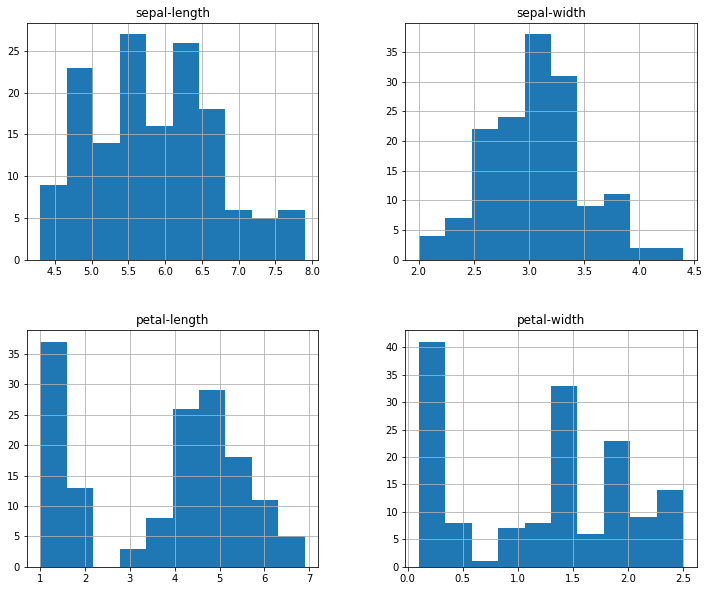

In [40]:
df.hist(figsize=(12,10));

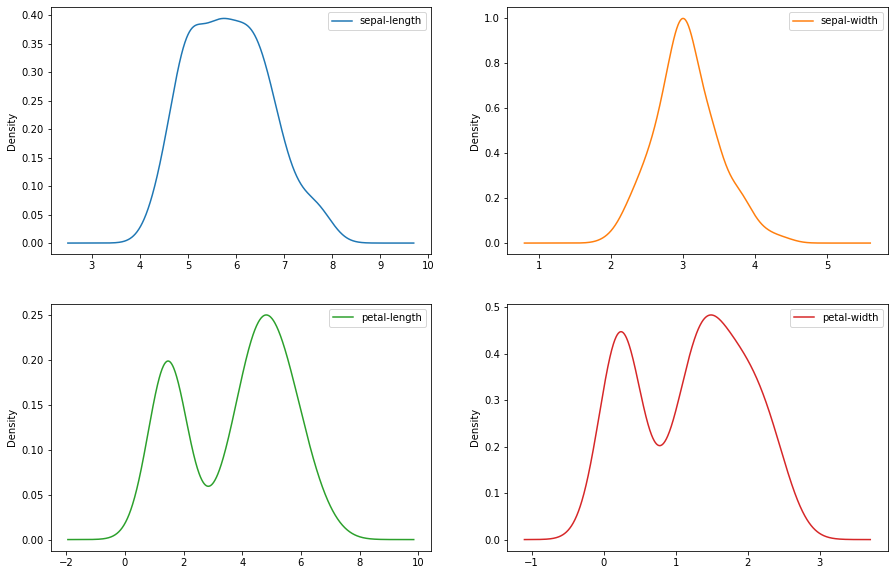

In [41]:
df.plot(figsize=(15,10), kind='density', subplots=True, 
          layout=(2,2), 
          sharex=False);

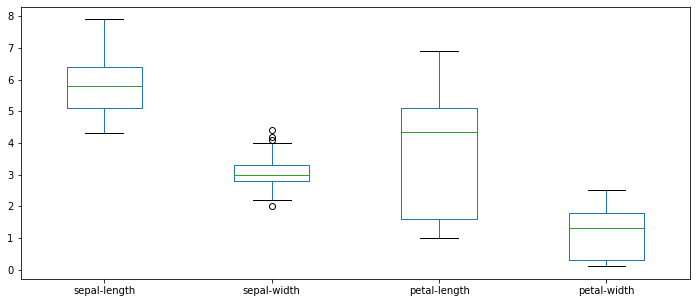

In [42]:
df.plot(figsize=(12,5), kind='box');

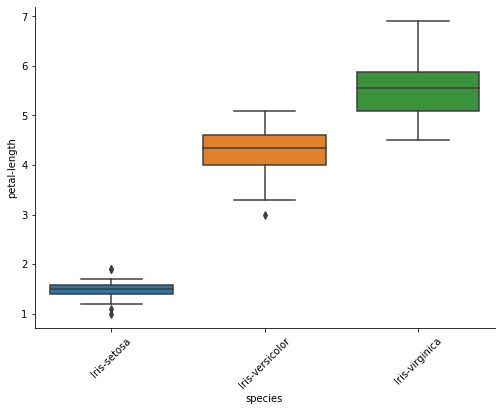

In [76]:
# Distributions of observations within categories
sns.catplot(x="species", y="petal-length", kind="box", data=df, height=5, aspect=11/8)
plt.xticks(rotation=45);

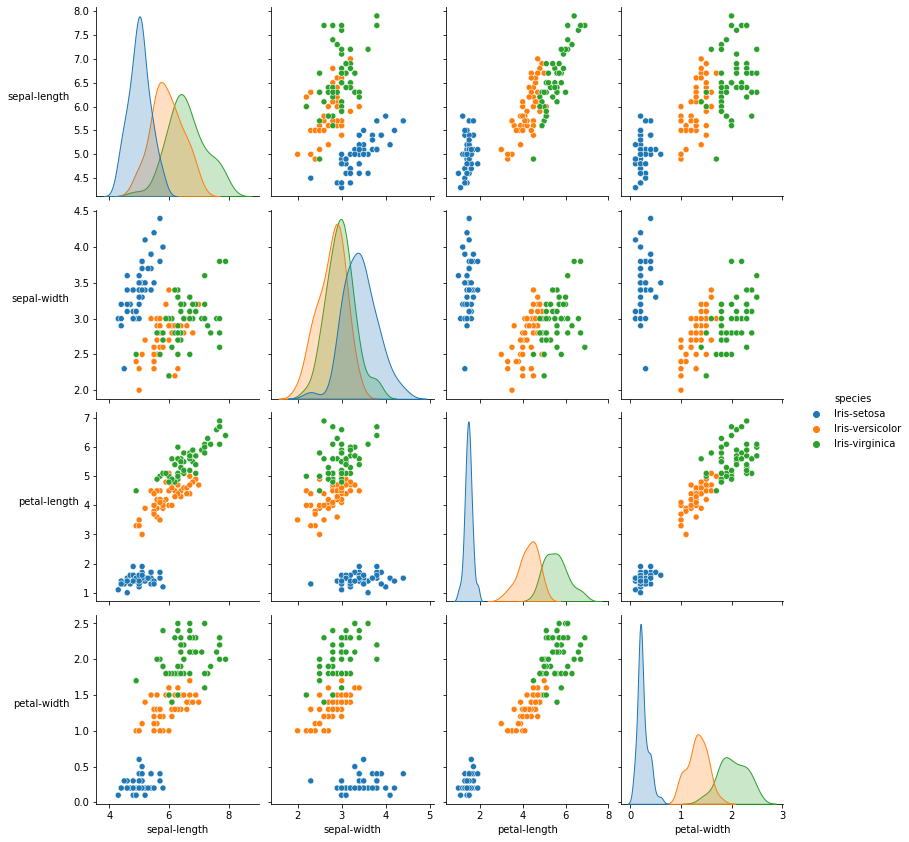

In [44]:
# Using seaborn, pairwise plot by income

g=sns.pairplot(df, diag_kind = 'kde', hue='species')
g.fig.set_size_inches(12,12);

# rotate labels
for ax in g.axes.flatten():
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

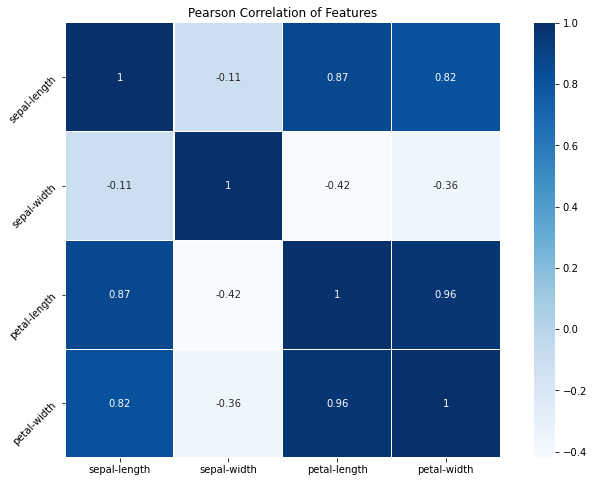

In [45]:
# using seaboarn to plot correlation heat map
corr = df.corr()

f, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(corr, cmap="Blues", annot=True, square=True, ax=ax,  linewidth = 0.1)
plt.title('Pearson Correlation of Features')
plt.yticks(rotation=45);

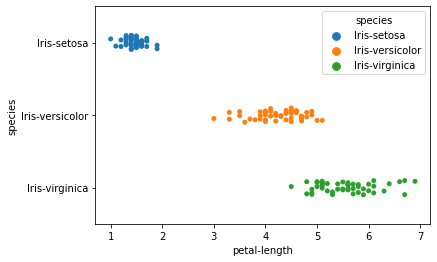

In [75]:
sns.stripplot(data=df, x="petal-length", y="species", hue="species");